# 前言

这里属下`三次样条插值`的实现  
`scipy`里应该有好几个实现吧，具体区别我也分不清，说下自己的理解  
三种方法展示都不知道怎么获得函数表达式

## 一维插值使用`cubic`参数

可能是样条, 可以得到y值
```python
from scipy.interpolate import interp1d
f = interp1d(x, y, kind = "cubic") # 一维插值; 二维插值用interp2d
y_news = f(x_news)
```

具体见文件`一维二维插值.ipynb`

## `splrep` 和 `splev` 实现`B样条插值` (可指定三次)

```python
import scipy.interpolate as interpolate
f_param=interpolate.splrep(X,Y,k=3) #样本点导入，生成参数
new_Y=interpolate.splev(new_x,f_param) #根据观测点和样条参数，生成插值
```

(array([-3.14159265, -3.14159265, -3.14159265, -3.14159265, -1.14159265,
       -0.14159265,  0.85840735,  2.85840735,  2.85840735,  2.85840735,
        2.85840735]), array([-1.38244133e-16, -7.63685468e-01, -1.38386429e+00, -1.66889975e-01,
        1.25624407e+00,  1.03067201e+00,  2.79415498e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00]), 3)


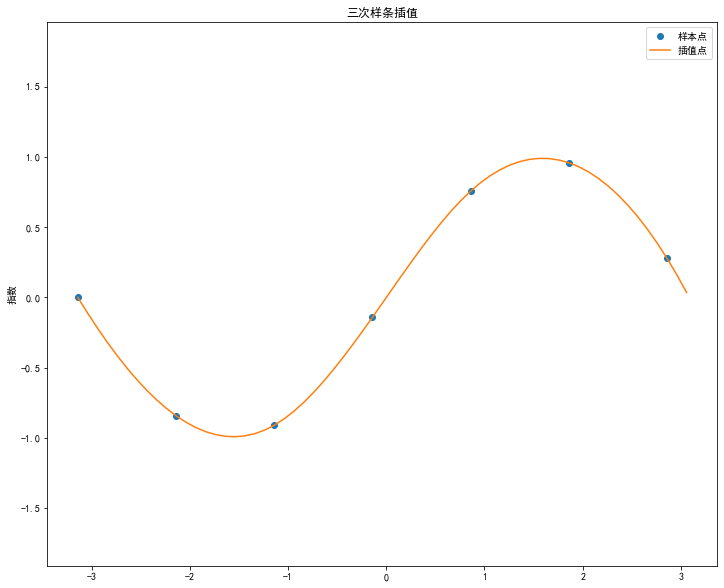

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as spi

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
 
#数据准备
X=np.arange(-np.pi,np.pi,1) #定义样本点X，从-pi到pi每次间隔1
Y= np.sin(X) #定义样本点Y，形成sin函数
new_x=np.arange(-np.pi,np.pi,0.1) #定义差值点
 
#进行三次样条插值
ipo3=spi.splrep(X,Y,k=3) #样本点导入，生成参数
iy3=spi.splev(new_x,ipo3) #根据观测点和样条参数，生成插值

fig,ax = plt.subplots(figsize=(12,10))

ax.plot(X,Y,'o',label='样本点')
ax.plot(new_x,iy3,label='插值点')
ax.set_ylim(Y.min()-1,Y.max()+1)
ax.set_ylabel('指数')
ax.set_title('三次样条插值')
ax.legend()

## CubicSpine

> - Parameters _bc_type_ and `interpolate` work independently, i.e. the former controls only construction of a spline, and the latter only evaluation.  
> - When a boundary condition is ‘not-a-knot’ and n = 2, it is replaced by a condition that the first derivative is equal to the linear interpolant slope. When both boundary conditions are ‘not-a-knot’ and n = 3, the solution is sought as a parabola passing through given points.  
> - When ‘not-a-knot’ boundary conditions is applied to both ends, the resulting spline will be the same as returned by `splrep` (with `s=0`) and `InterpolatedUnivariateSpline`, but these two methods use a representation in B-spline basis.

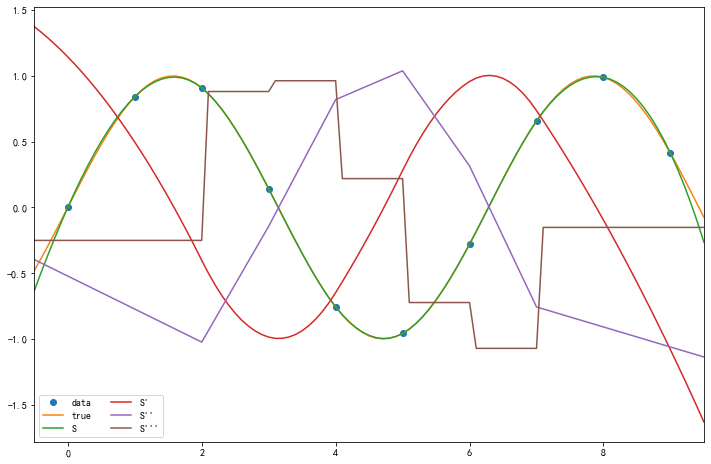

In [8]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
xs = np.arange(-0.5, 9.6, 0.1)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, np.sin(xs), label='true')
ax.plot(xs, cs(xs), label="S")
ax.plot(xs, cs(xs, 1), label="S'")
ax.plot(xs, cs(xs, 2), label="S''")
ax.plot(xs, cs(xs, 3), label="S'''")
ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)
plt.show()